# Exercise 4 : Clustering and Data Visualization

## Group nickname: MuonGang

### Participants:
    - Valente Alessandro 1234429
    - Ardino Rocco 1231629 
    - Paccagnella Andrea 1211171

# Index <a class="anchor" id="Ex4.i"></a>

1. [Import and visualize the data](#Ex4.1.)<br>
2. [Application of t-SNE algorithm to the data](#Ex4.2.)<br>
    2.1. [Standard t-SNE for scikit package](#Ex4.2.1.)<br>
    2.2. [t-SNE exact method](#Ex4.2.2.)<br>
    2.3. [3D t-SNE](#Ex4.2.3.)<br>
3. [Implementation of the DBSCAN algorithm](#Ex4.3.)<br>
4. [Experiments](#Ex4.4.)<br>

## 1. - Import and visualize the data <a class="anchor" id="Ex4.1."></a>
* [Index](#Ex4.i)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data= np.loadtxt("data_t-SNE_310101_d5_R100_e1_N800.dat", delimiter='\t', dtype=np.int32)
print(data.shape)
print(data[0])

(800, 5)
[ -83065   29521   68815 -100340  -29235]


In [3]:
def plot_dim(data, i=1, j=2, k=3, frac1=0.1, frac2=0.3, angle1=60, angle2=20): #angle1 is the elevation, angle2 the xy angle
    dim=len(data[0])
    if dim<i or dim<j or dim<k:
        print("Dimensional error")
        return
    
    x = np.array(data[:,i])
    y = np.array(data[:,j])
    z = np.array(data[:,k])
    
    N  = len(x)
    N1 = int(N*frac1)
    N2 = int(N*frac2)
    N3 = int(N*(1-frac1-frac2))
    
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection='3d')
    
    x1 = x[:N1]
    x2 = x[N1:(N1+N2)]
    x3 = x[(N1+N2):]
    y1 = y[:N1]
    y2 = y[N1:(N1+N2)]
    y3 = y[(N1+N2):]
    z1 = z[:N1]
    z2 = z[N1:(N1+N2)]
    z3 = z[(N1+N2):]
    
    ax.scatter(x3,y3,z3, c='b')
    ax.scatter(x1,y1,z1, c='r')
    ax.scatter(x2,y2,z2, c='g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(angle1, angle2)

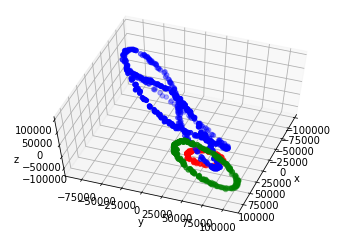

In [4]:
plot_dim(data, angle2=20)

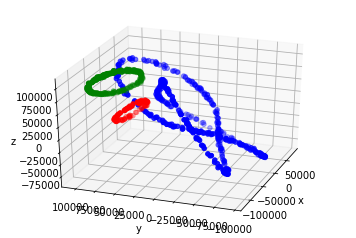

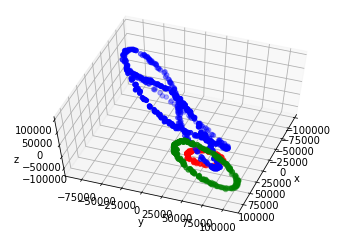

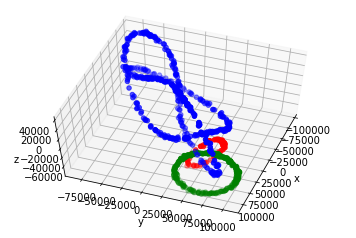

In [5]:
plot_dim(data, 0,1,2, angle1=30, angle2=200)
plot_dim(data, 1,2,3)
plot_dim(data, 1,2,4)

## 2. - Application of t-SNE algorithm to the data <a class="anchor" id="Ex4.2."></a>
* [Index](#Ex4.i)

### 2.1. - Standard t-SNE for scikit package <a class="anchor" id="Ex4.2.1."></a>

In [6]:
from sklearn import manifold, datasets
from time import time

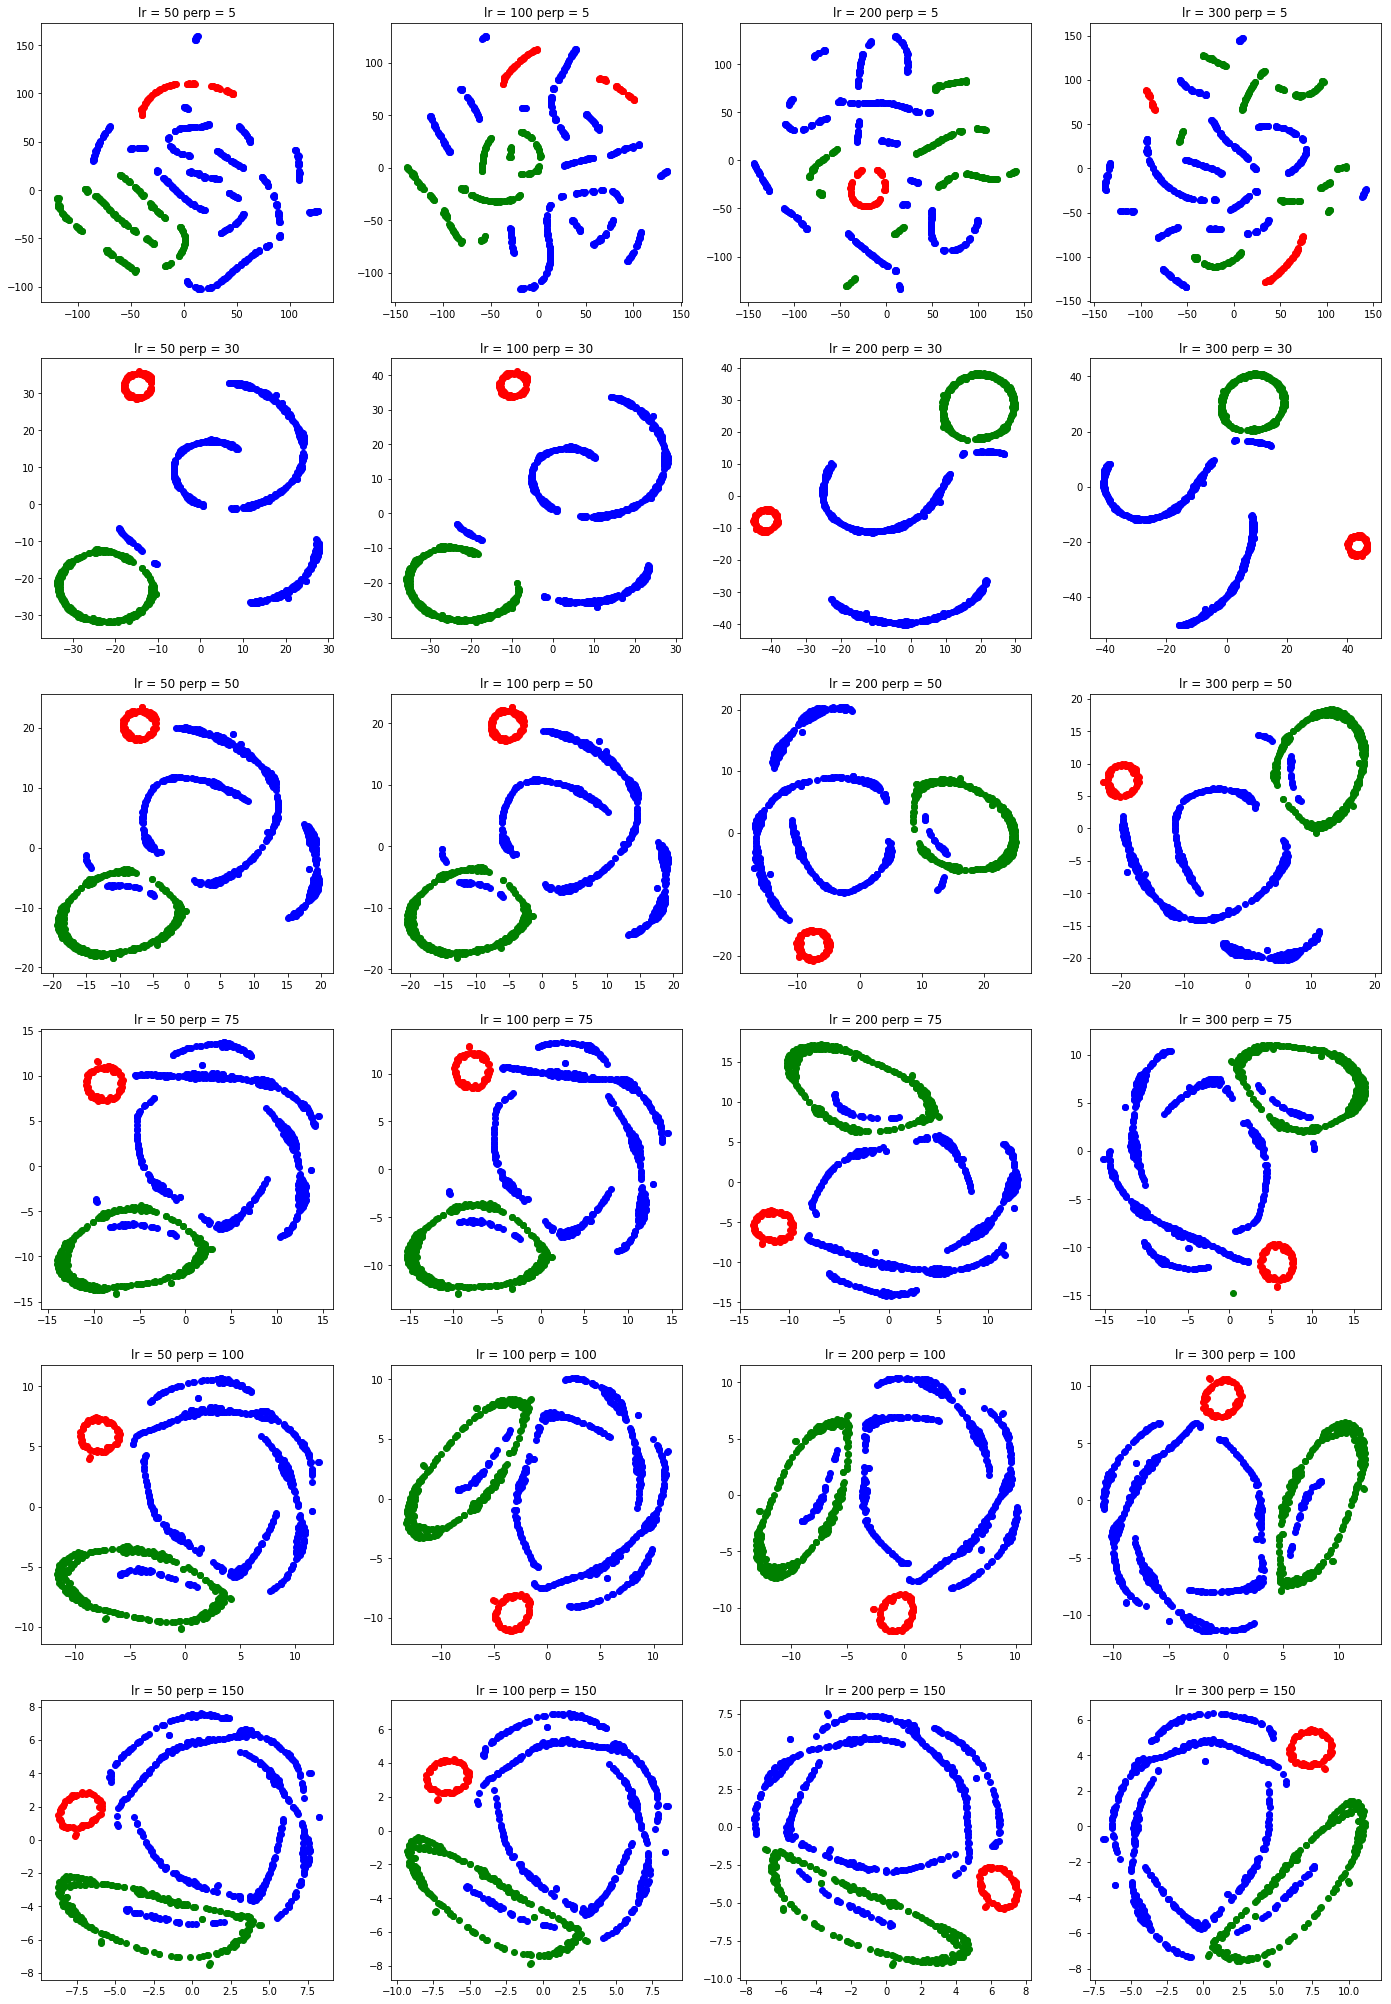

In [7]:
perplexities   = [ 5,  30,  50,  75, 100, 150]
learning_rates = [50, 100, 200, 300]
frac1 = 0.1
frac2 = 0.3

n_components = 2
fig, ax = plt.subplots(len(perplexities), len(learning_rates), figsize=(6*len(learning_rates), 6*len(perplexities)))

for i in range(len(perplexities)):
    for j in range(len(learning_rates)):
        perp = perplexities[i]
        lr   = learning_rates[j]
        tsne = manifold.TSNE(n_components=n_components, init='random', perplexity=perp, 
                             early_exaggeration=10.0, learning_rate=lr, 
                             n_iter=5000, random_state=0)
        data_transf = tsne.fit_transform(data)
        
        x = data_transf[:,0]
        y = data_transf[:,1]
        
        N  = len(x)
        N1 = int(N*frac1)
        N2 = int(N*frac2)
        N3 = int(N*(1-frac1-frac2))
        
        x1 = x[:N1]
        x2 = x[N1:(N1+N2)]
        x3 = x[(N1+N2):]
        y1 = y[:N1]
        y2 = y[N1:(N1+N2)]
        y3 = y[(N1+N2):]
        
        ax[i,j].scatter(x1,y1, c='r')
        ax[i,j].scatter(x3,y3, c='b')
        ax[i,j].scatter(x2,y2, c='g')
        ax[i,j].set_title("lr = "+str(lr)+" perp = "+str(perp))

This is similar to what we expect, the algorithm is able to visualize the 3 clusters efficiently, obviously depending on the parameters chosen.



### 2.2. - t-SNE exact method <a class="anchor" id="Ex4.2.2."></a>

The t-SNE implementation by scikit by default (so also in this case) uses the Barnes-Hut approximation to reduce its computational cost (going from a scaling of $\textit{O}(N^2)$ to a scaling of $\textit{O}(N\log N)$).

To see if we can get better results, we can try to run the same algorithm but with the exact method, which will give better results but it also needs more time.
We are allowed to do this only because we have a small number of points to be visualized, in case of bigger datasets this would result in a too heavy computation and too long time waiting, we will also have to reduce the number of parameters to avoid too heavy calculations.

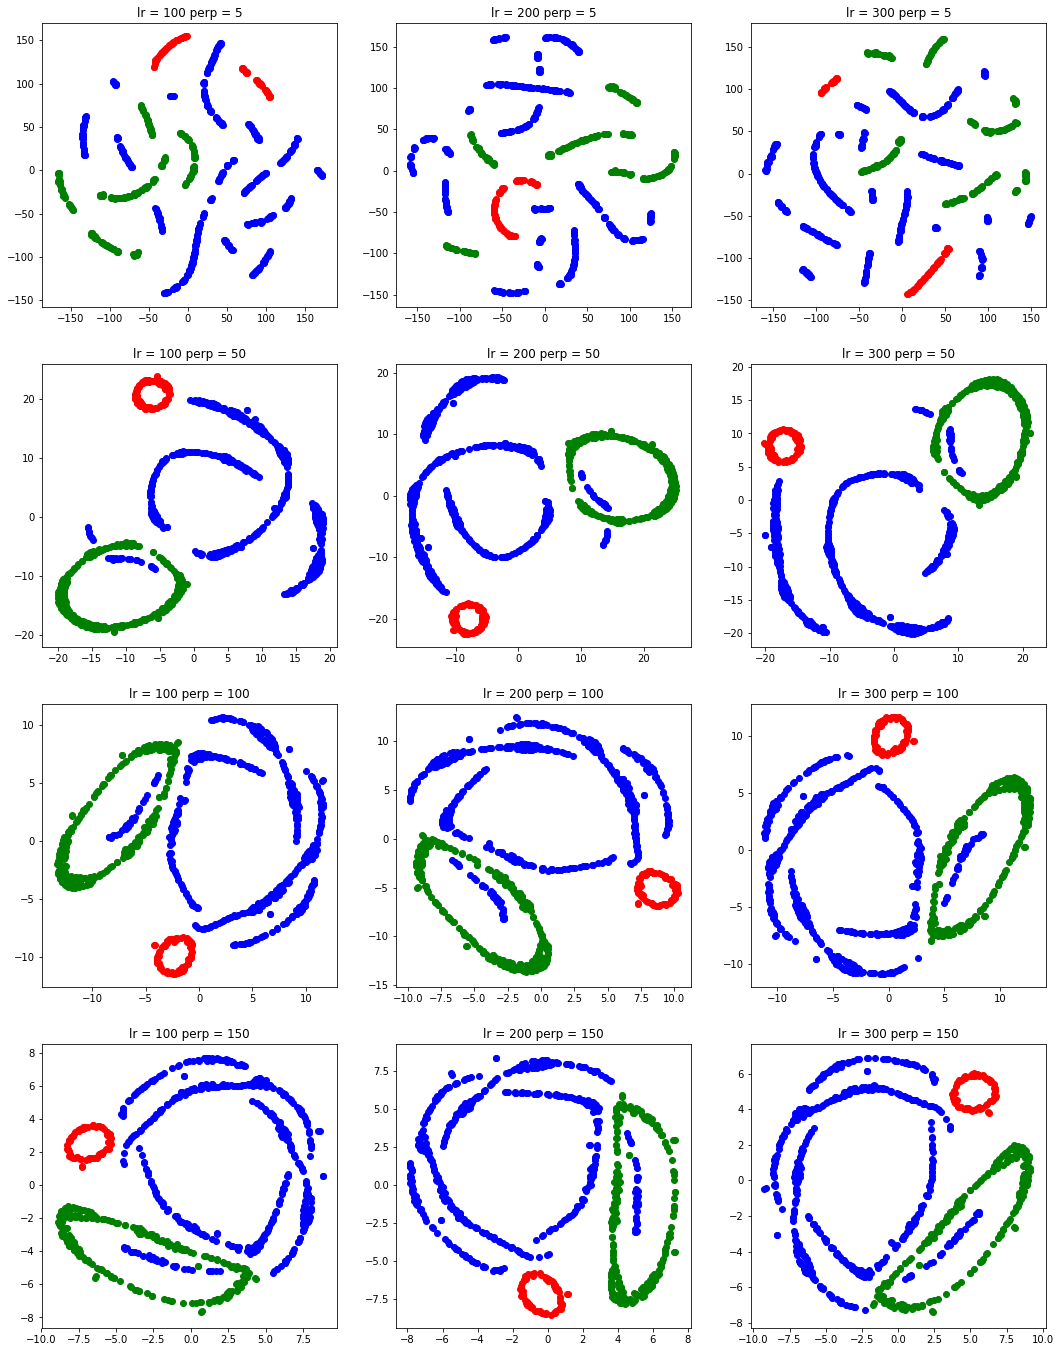

In [8]:
# we have to reduce the numer of cases to reduce the computation time
perplexities   = [  5,  50, 100, 150]
learning_rates = [100, 200, 300]
frac1 = 0.1
frac2 = 0.3

n_components = 2
fig, ax = plt.subplots(len(perplexities), len(learning_rates), figsize=(6*len(learning_rates), 6*len(perplexities)))

for i in range(len(perplexities)):
    for j in range(len(learning_rates)):
        #print("doing "+str(i)+","+str(j))
        
        perp = perplexities[i]
        lr   = learning_rates[j]
        tsne = manifold.TSNE(n_components=n_components, init='random', perplexity=perp, 
                             early_exaggeration=10.0, learning_rate=lr, 
                             n_iter=5000, random_state=0, method='exact')
        data_transf = tsne.fit_transform(data)
        
        x = data_transf[:,0]
        y = data_transf[:,1]
        
        N  = len(x)
        N1 = int(N*frac1)
        N2 = int(N*frac2)
        N3 = int(N*(1-frac1-frac2))
        
        x1 = x[:N1]
        x2 = x[N1:(N1+N2)]
        x3 = x[(N1+N2):]
        y1 = y[:N1]
        y2 = y[N1:(N1+N2)]
        y3 = y[(N1+N2):]
        
        ax[i,j].scatter(x1,y1, c='r')
        ax[i,j].scatter(x3,y3, c='b')
        ax[i,j].scatter(x2,y2, c='g')
        ax[i,j].set_title("lr = "+str(lr)+" perp = "+str(perp))

There is a very small improvement in the data division but it is not sufficient to justify the computational cost that the exact method requires.

In both cases we can observe that most of the results are similar except for a rotation in the projection plane, this is not a problem since the t-SNE is a stochastich algorithm, this fact justify also the slight difference in the range the data are represented.

### 2.3. - 3D t-SNE <a class="anchor" id="Ex4.2.3."></a>

One last thing we can try is to apply the t-SNE algorithm but requiring a 3 dimensional output

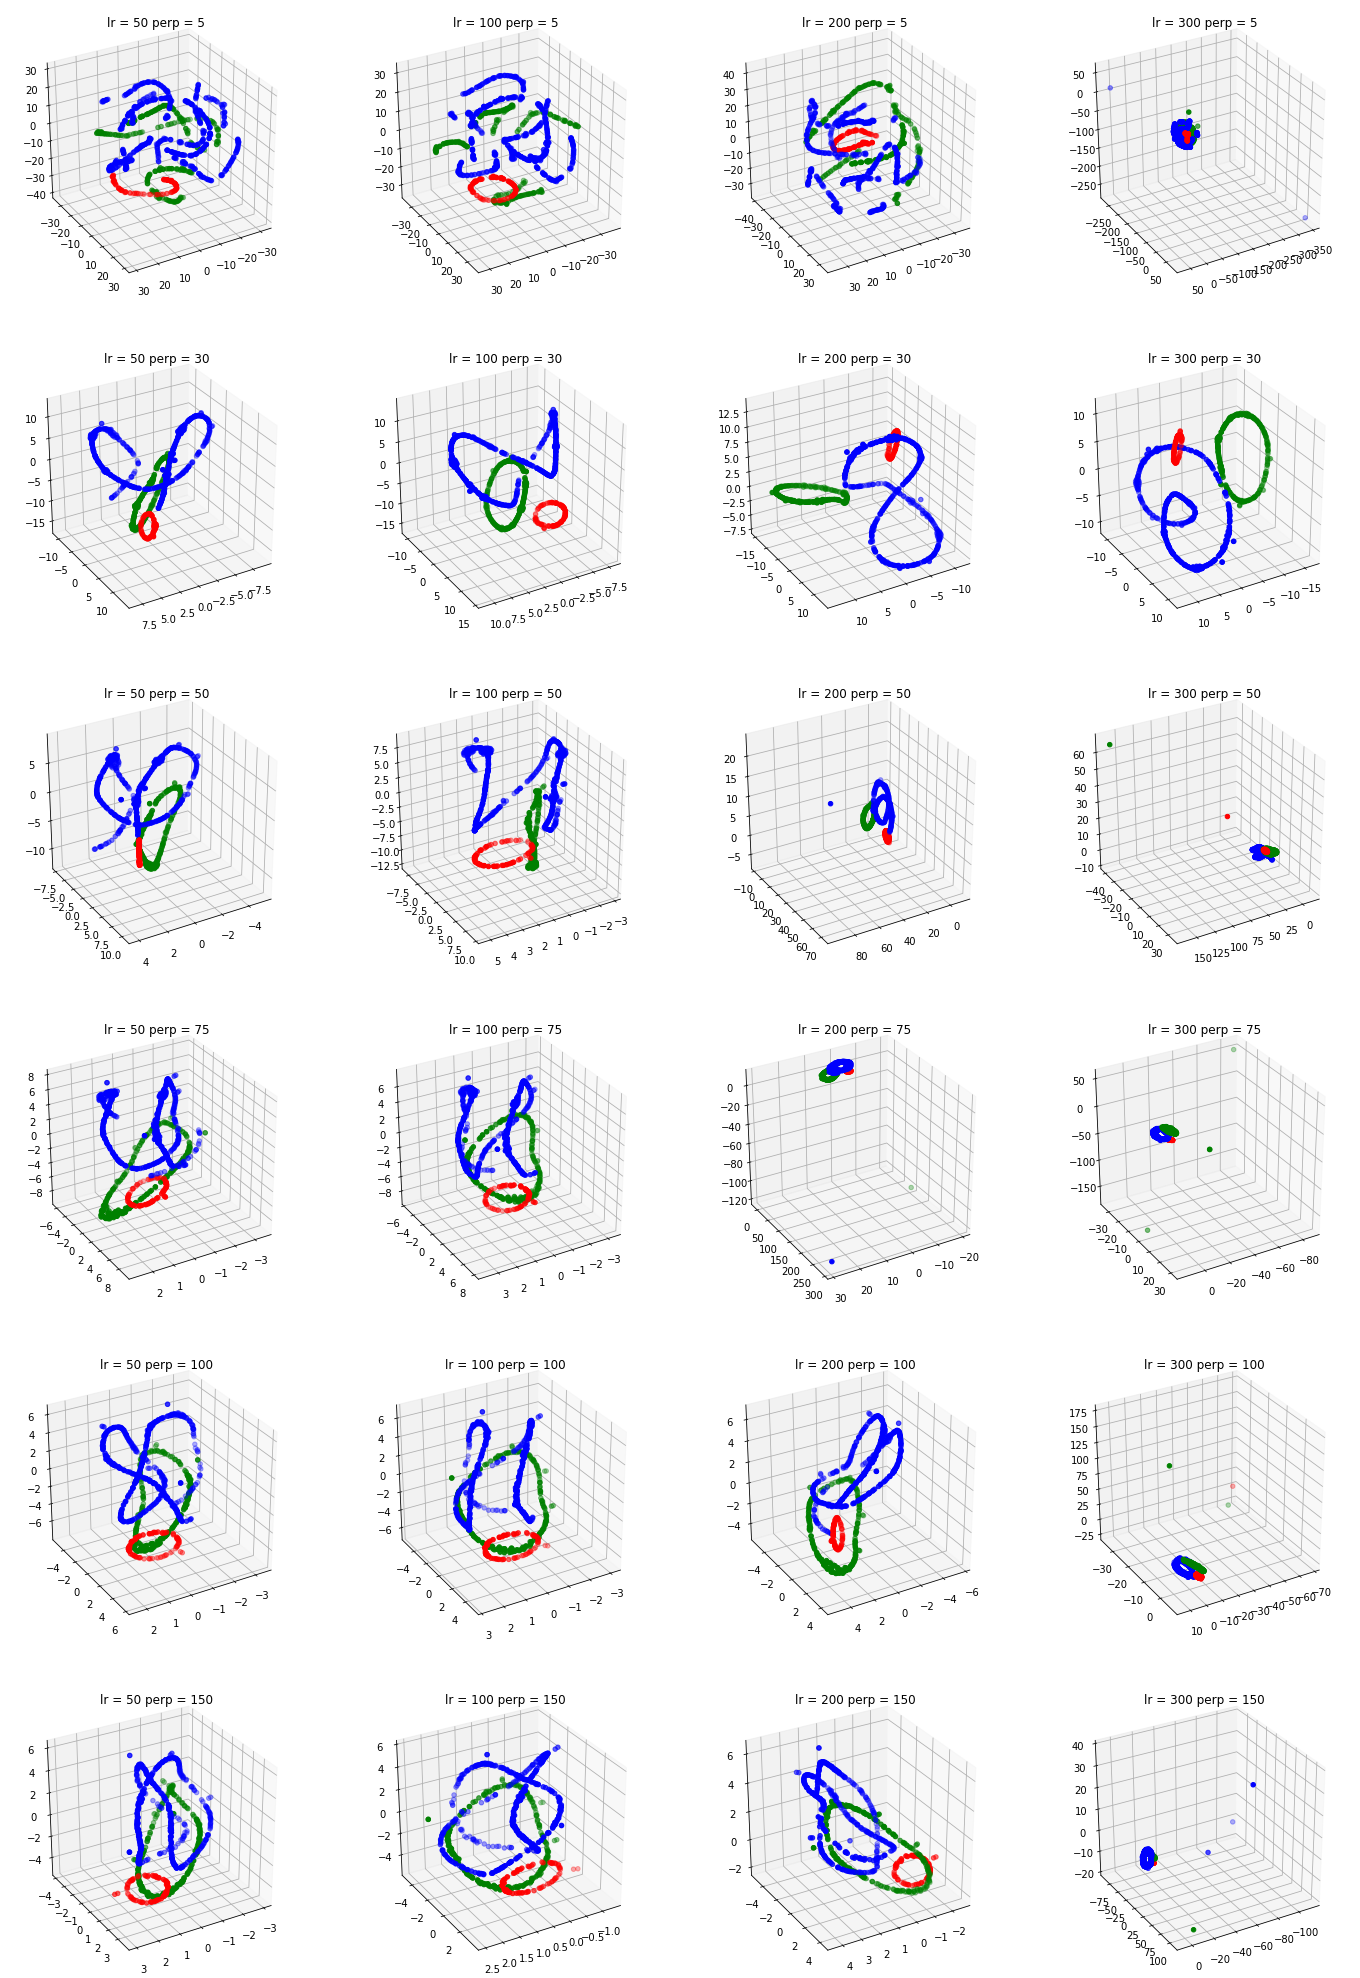

In [9]:
perplexities   = [ 5,  30,  50,  75, 100, 150]
learning_rates = [50, 100, 200, 300]
#perplexities   = [ 5,  30]
#learning_rates = [50, 100]

frac1 = 0.1
frac2 = 0.3

n_components = 3
nr = len(perplexities)
nc = len(learning_rates)

fig = plt.figure(figsize=(6*nc,6*nr))

for i in range(nr):
    for j in range(nc):
        ax   = fig.add_subplot(nr, nc, i*nc+j+1, projection='3d')
        perp = perplexities[i]
        lr   = learning_rates[j]
        tsne = manifold.TSNE(n_components=n_components, init='random', perplexity=perp, 
                             early_exaggeration=10.0, learning_rate=lr, 
                             n_iter=5000, random_state=0)
        data_transf = tsne.fit_transform(data)
        
        x = data_transf[:,0]
        y = data_transf[:,1]
        z = data_transf[:,2]
        
        N  = len(x)
        N1 = int(N*frac1)
        N2 = int(N*frac2)
        N3 = int(N*(1-frac1-frac2))
        
        x1 = x[:N1]
        x2 = x[N1:(N1+N2)]
        x3 = x[(N1+N2):]
        y1 = y[:N1]
        y2 = y[N1:(N1+N2)]
        y3 = y[(N1+N2):]
        z1 = z[:N1]
        z2 = z[N1:(N1+N2)]
        z3 = z[(N1+N2):]
        
        ax.scatter(x1,y1,z1, c='r')
        ax.scatter(x3,y3,z3, c='b')
        ax.scatter(x2,y2,z2, c='g')
        ax.set_title("lr = "+str(lr)+" perp = "+str(perp))
        ax.view_init(30, 60)

We can see that for the 3D algorithm we still have a nice convergence and the data are nicely represented but it's important to notice that the parameters have to be chosen more carefully since for some learning rates the algorithm has bad (at least visually) results, there may be a possible improvement by using the exact method but it's computational cost will be too high.

## 3. - Implementation of the DBSCAN algorithm <a class="anchor" id="Ex4.3."></a>
* [Index](#Ex4.i)

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [11]:
from collections import OrderedDict

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """
    Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c * np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=4)

In [12]:
X      = np.loadtxt("data_t-SNE_310101_d5_R100_e1_N800.dat", delimiter='\t', dtype=np.int32)
Y_true = np.zeros(len(X))

frac1 = 0.1
frac2 = 0.3

N  = len(x)
N1 = int(N*frac1)
N2 = int(N*frac2)
N3 = int(N*(1-frac1-frac2))

Y_true[:N1]        = 0
Y_true[N1:(N1+N2)] = 1
Y_true[(N1+N2):]   = 2

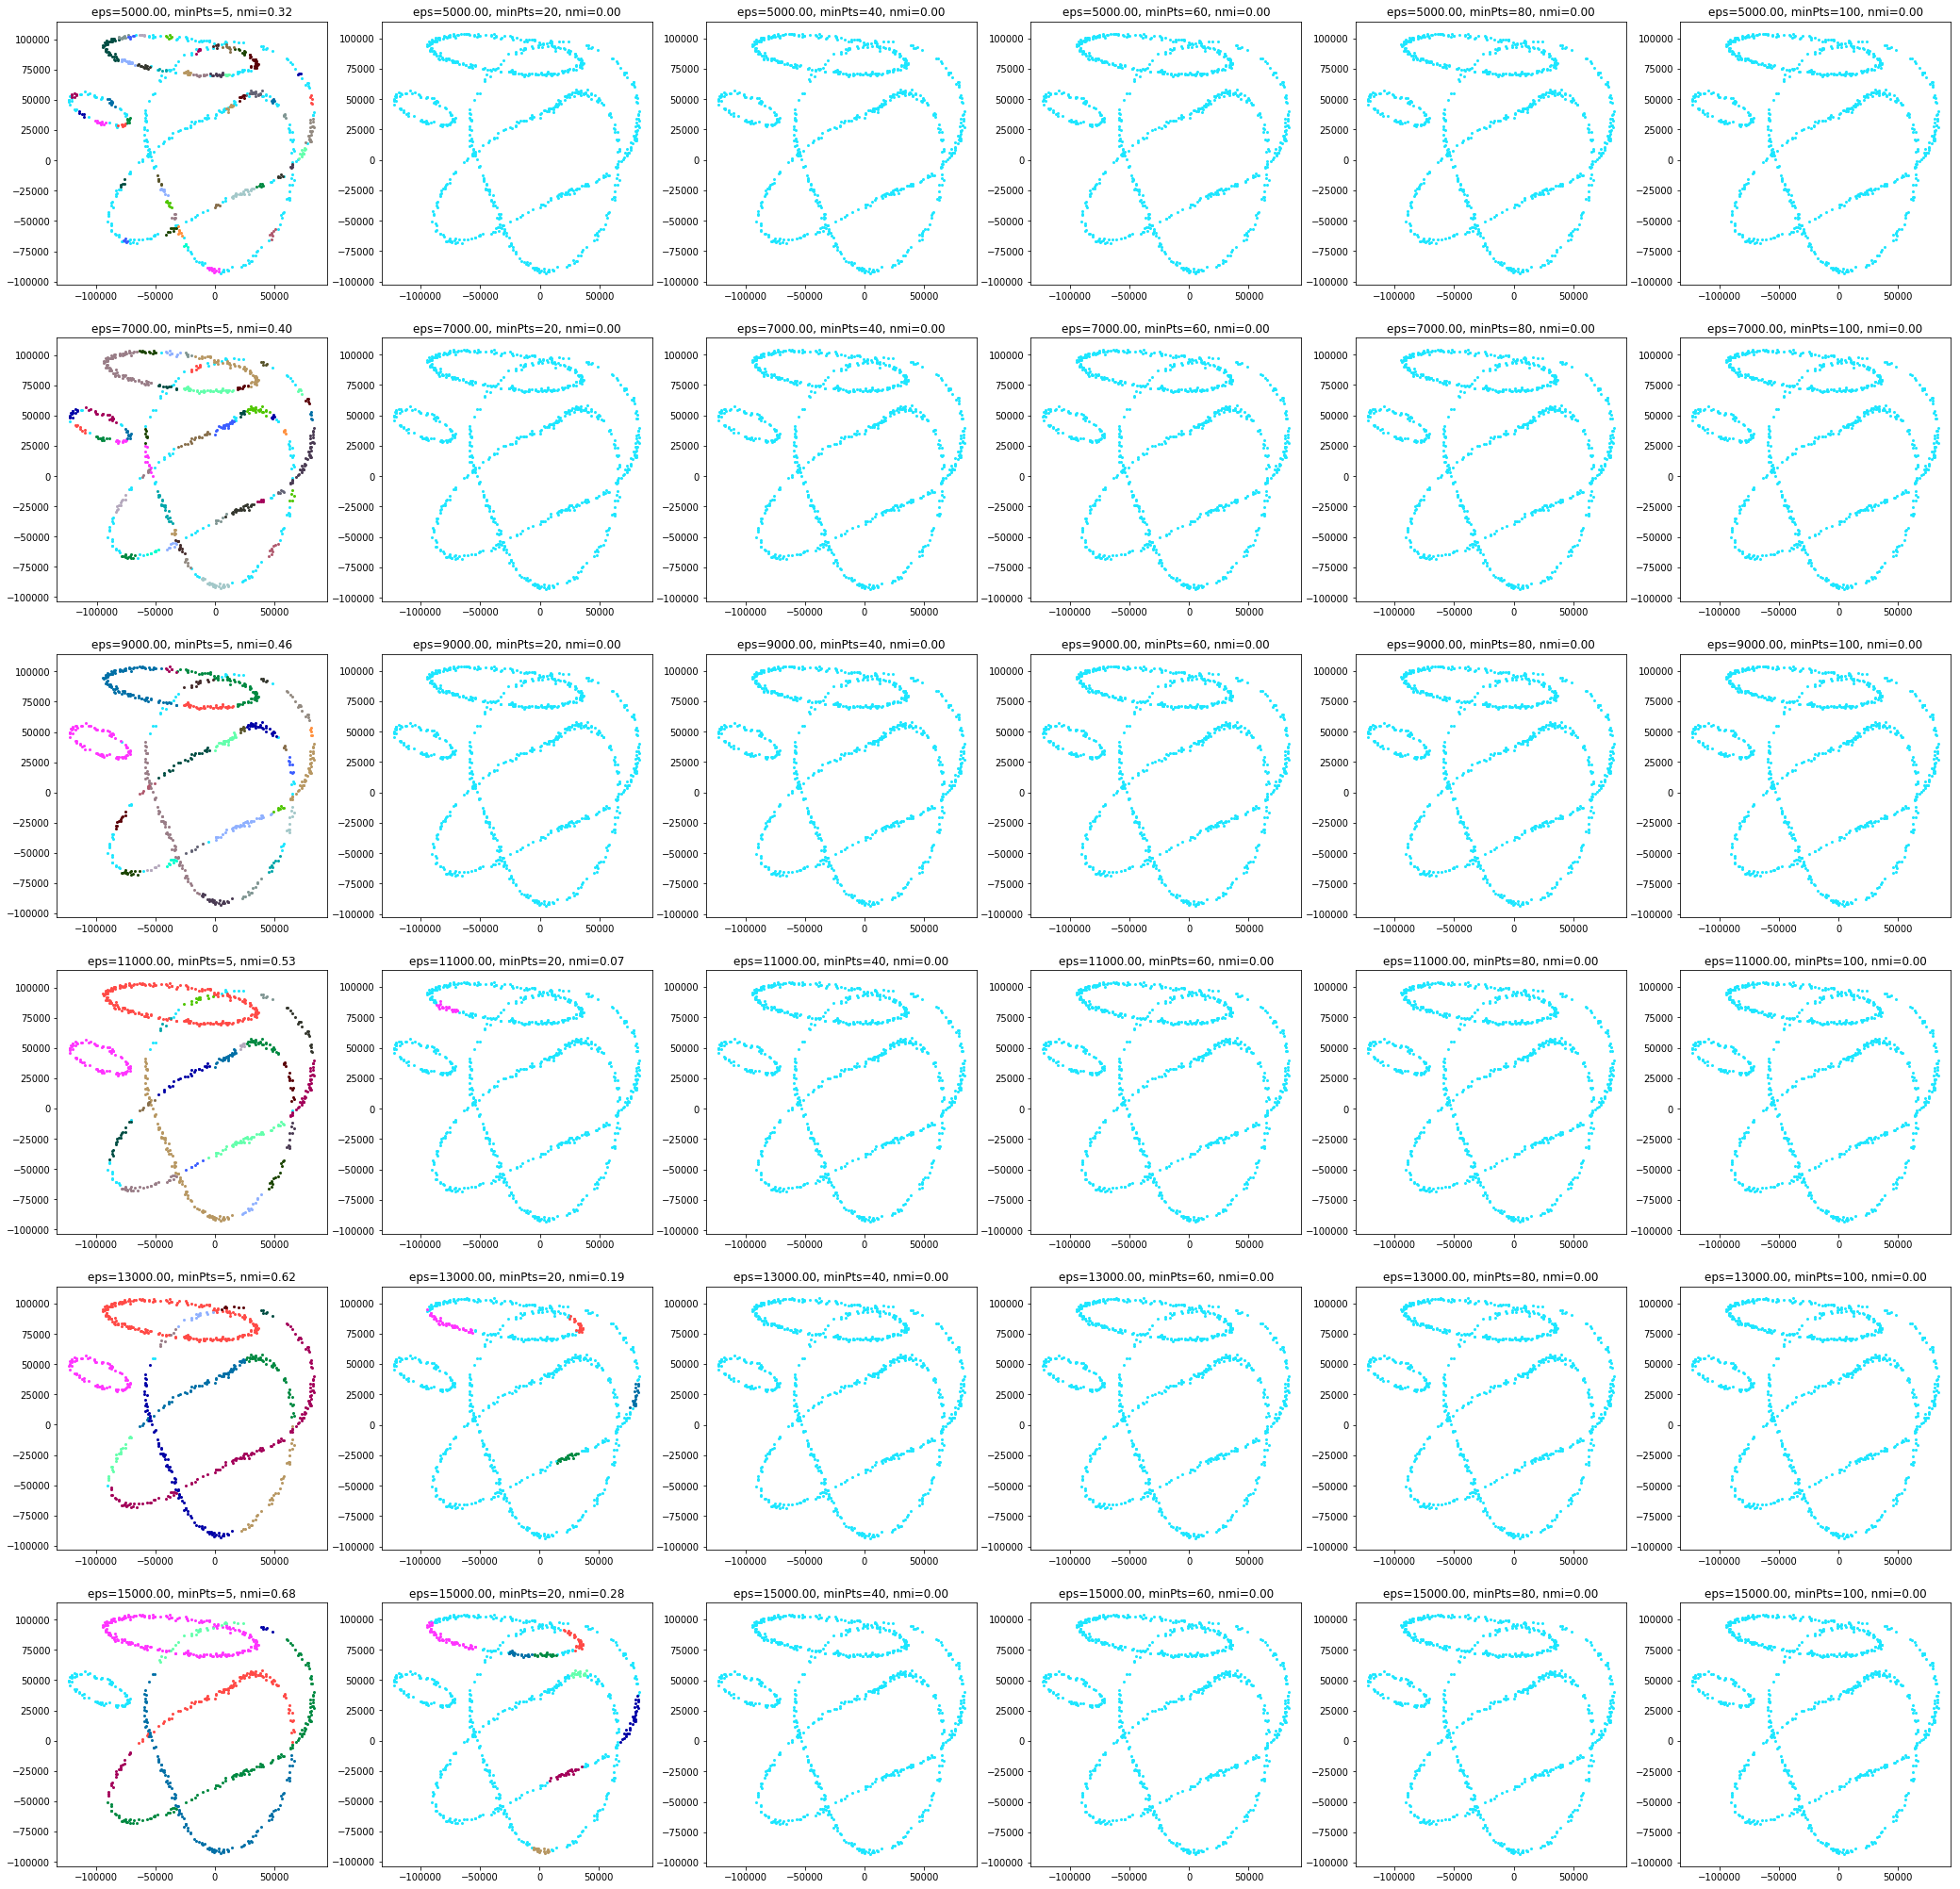

In [13]:
epss  = [1e4 + x for x in np.linspace(-5000, 5000, 6)]
minsp = [5, 20, 40, 60, 80, 100]

fig, ax = plt.subplots(len(epss),len(minsp),figsize=(6*len(minsp), 6*len(epss)))

for i, eps in enumerate(epss):
    for j, min_samples in enumerate(minsp):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y = model.labels_
        
        plotting_ax(X,y,ax[i,j])
        nmi = NMI(y, Y_true)
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))

#plt.tight_layout(h_pad=0.5)
plt.show()

This was a very coarse grid search. Now we can try to use a finer one to find the best parameters.

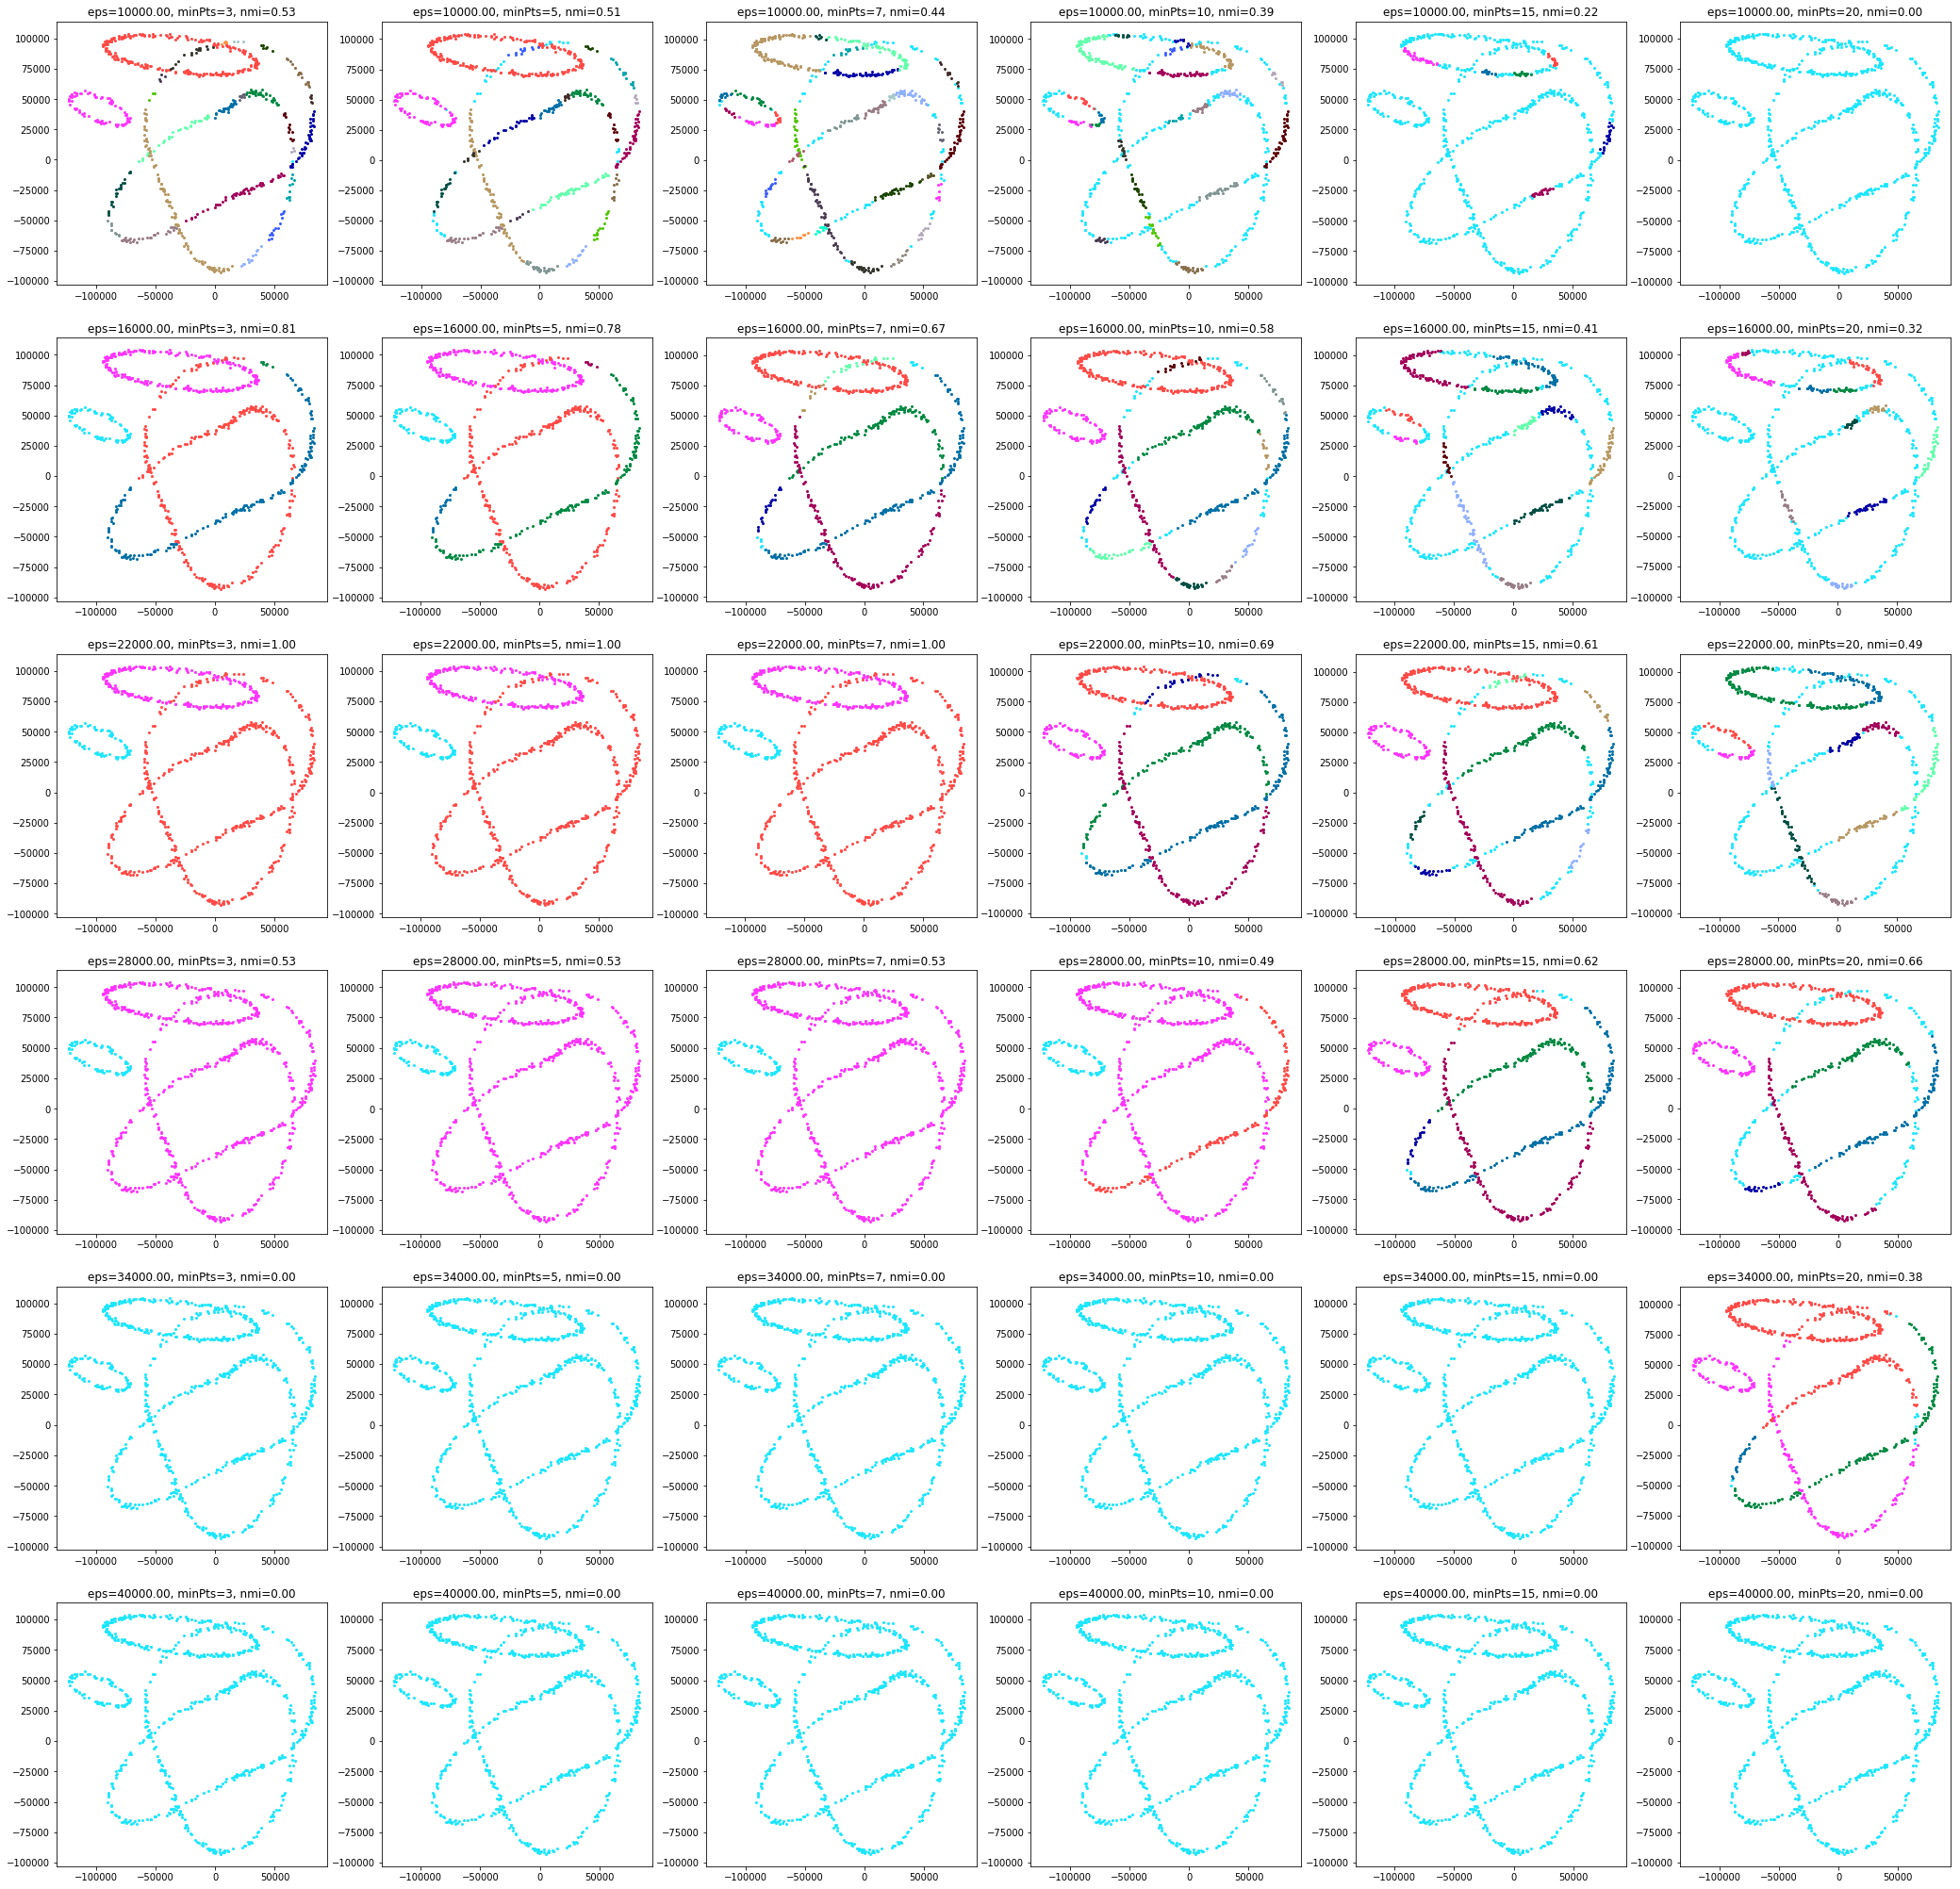

In [14]:
epss  = [x for x in np.linspace(1e4, 4e4, 6)]
minsp = [3, 5, 7, 10, 15, 20]

fig, ax = plt.subplots(len(epss),len(minsp),figsize=(6*len(minsp), 6*len(epss)))

for i, eps in enumerate(epss):
    for j, min_samples in enumerate(minsp):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y = model.labels_
        
        plotting_ax(X,y,ax[i,j])
        nmi = NMI(y, Y_true)
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))

#plt.tight_layout(h_pad=0.5)
plt.show()

As we can see, the best results are for eps around $2\cdot 10^4$ and min points number between 3 and 10, so in the last grid we can show the best ones:

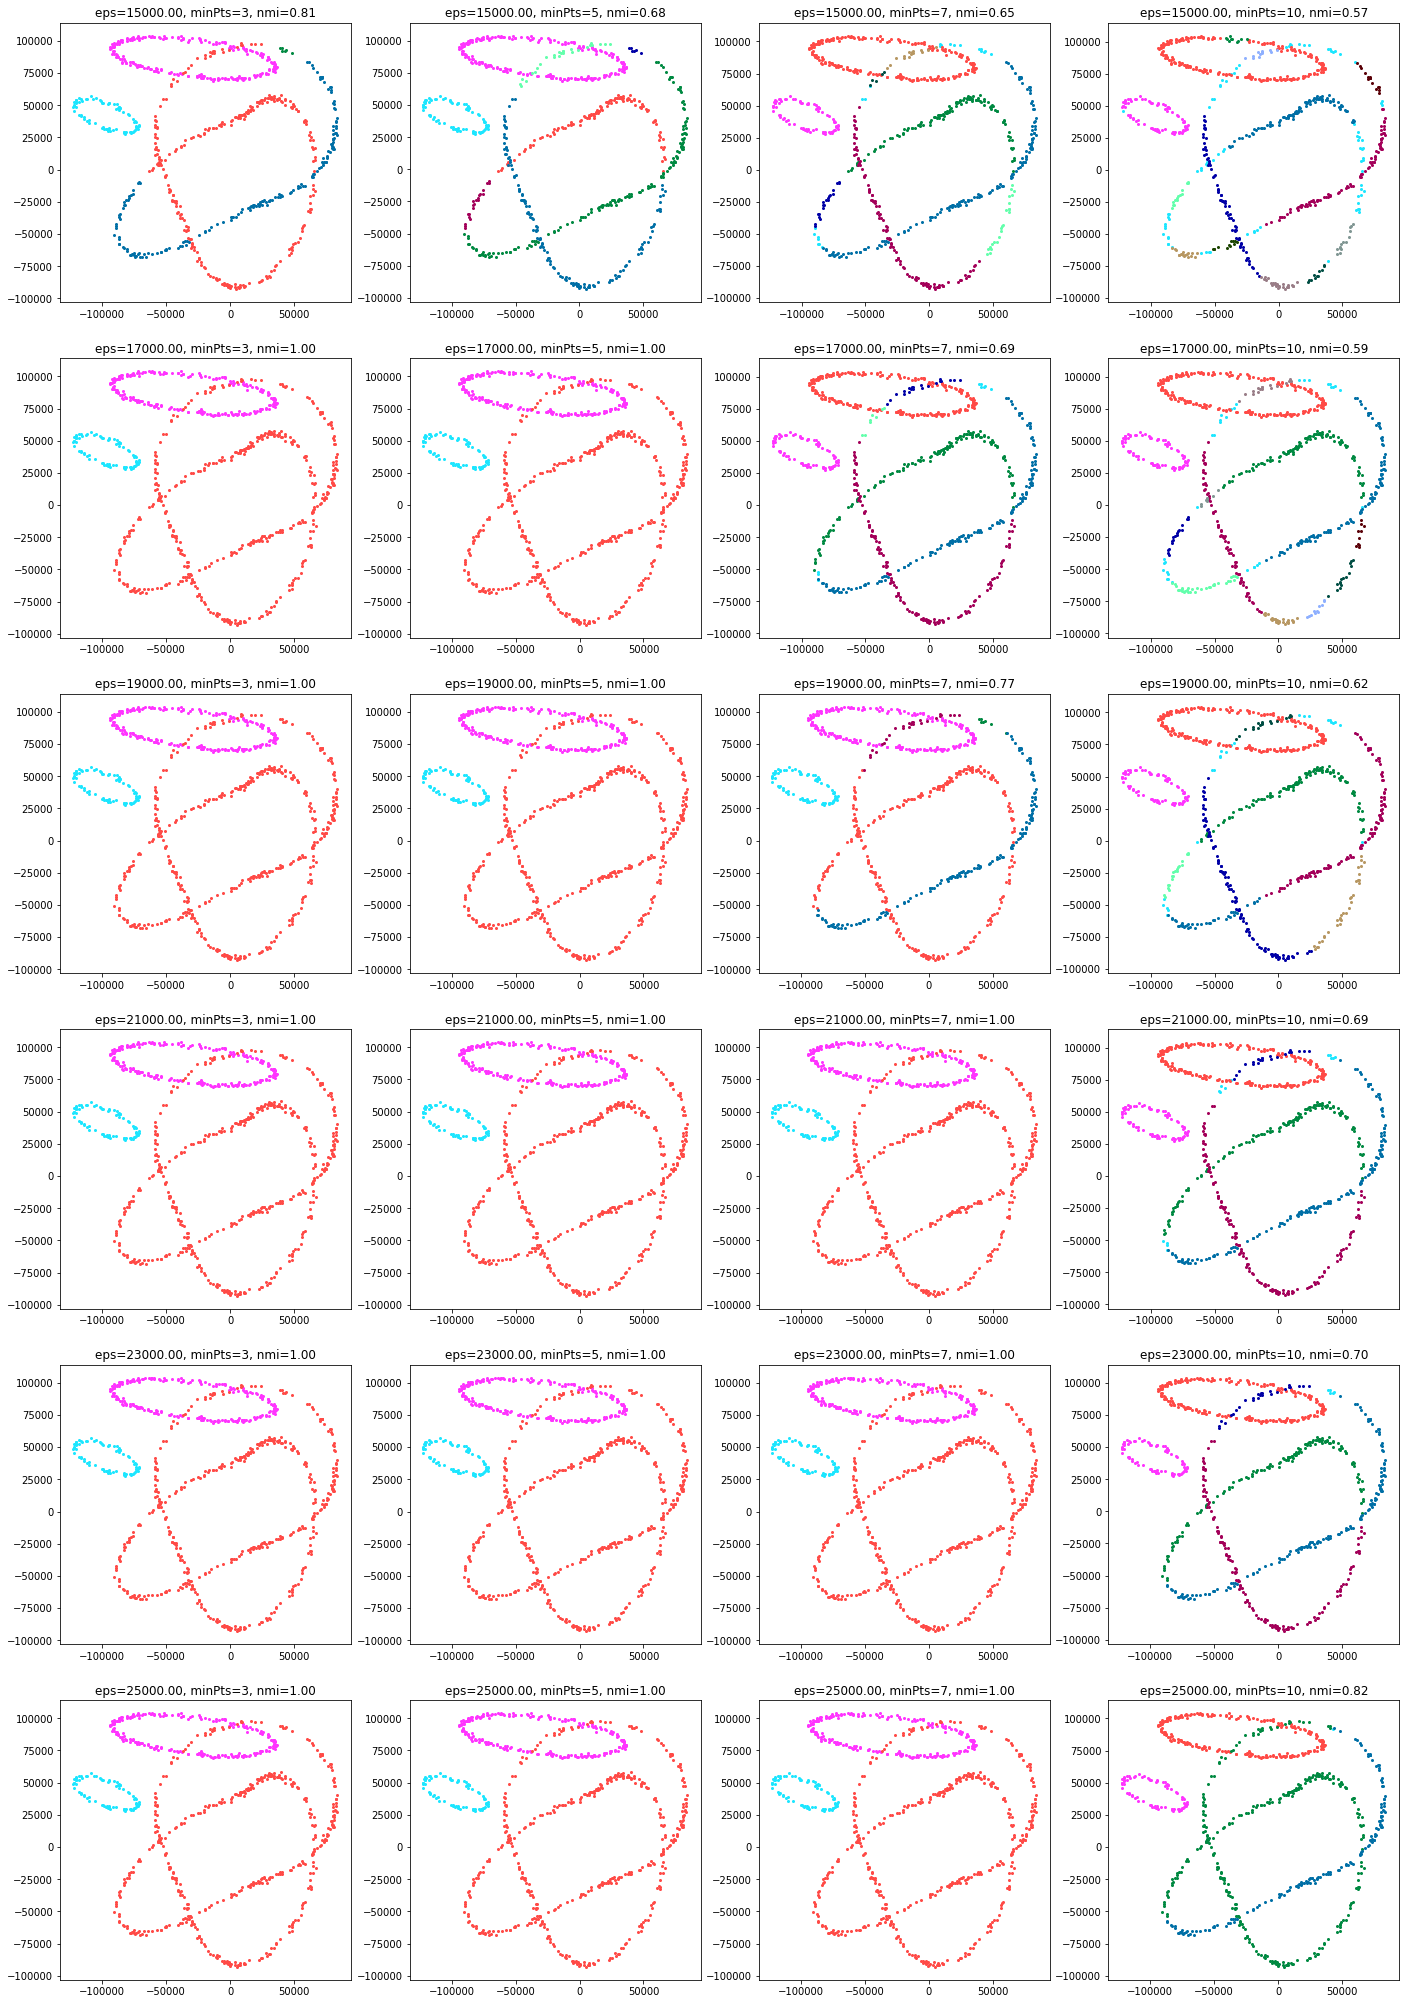

In [15]:
epss  = [x for x in np.linspace(1.5e4, 2.5e4, 6)]
minsp = [3, 5, 7, 10]

fig, ax = plt.subplots(len(epss),len(minsp),figsize=(6*len(minsp), 6*len(epss)))
best_nmi=0
best_y=[]
for i, eps in enumerate(epss):
    for j, min_samples in enumerate(minsp):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y = model.labels_
        plotting_ax(X,y,ax[i,j])
        nmi=NMI(y, Y_true)
        if(nmi>best_nmi):
            best_nmi=nmi
            best_y=y
        #print(y)
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))

#plt.tight_layout(h_pad=0.5)
plt.show()

We can observe that visually, the data seem to be correctly classified and this can be confirmed by looking at the nmi value which goes to 1 for a full correctly classified data sample.

## 4. - Experiments <a class="anchor" id="Ex4.4."></a>
* [Index](#Ex4.i)

The first thing we can do is to compare the tSNE algorithm with some other manifold algorithms that can be found in the scikit package and also with the PCA

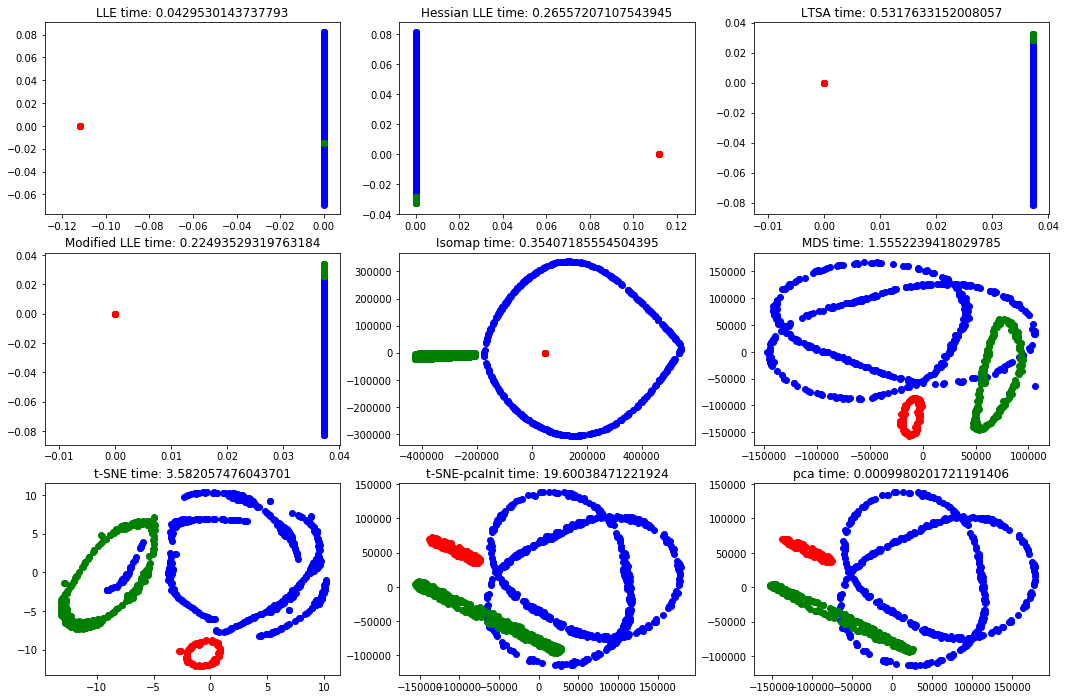

In [16]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn.decomposition import PCA
from sklearn import manifold, datasets

X      = np.loadtxt("data_t-SNE_310101_d5_R100_e1_N800.dat", delimiter='\t', dtype=np.int32)
Y_true = np.zeros(len(X))

frac1 = 0.1
frac2 = 0.3

N  = len(x)
N1 = int(N*frac1)
N2 = int(N*frac2)
N3 = int(N*(1-frac1-frac2))

Y_true[:N1]        = 0
Y_true[N1:(N1+N2)] = 1
Y_true[(N1+N2):]   = 2


n_neighbors  = 10
n_components =  2


# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding, n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE']           = LLE(method='standard')
methods['Hessian LLE']   = LLE(method='hessian')
#methods['SE']           = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
methods['LTSA']          = LLE(method='ltsa')
methods['Modified LLE']  = LLE(method='modified')
methods['Isomap']        = manifold.Isomap(n_neighbors, n_components)
methods['MDS']           = manifold.MDS(n_components, max_iter=100, n_init=1)

#we use our best tsne
methods['t-SNE']         = manifold.TSNE(n_components=n_components, 
                                        init='random', perplexity=100, 
                                        early_exaggeration=10.0, 
                                        learning_rate=200, n_iter=5000,
                                        random_state=0)
methods['t-SNE-pcaInit'] = manifold.TSNE(n_components=n_components,
                                         init='pca', perplexity=100, 
                                         early_exaggeration=10.0, 
                                         learning_rate=200, n_iter=5000, 
                                         random_state=0)
methods['pca']           = PCA(n_components=n_components, svd_solver='auto')

fig, ax= plt.subplots(3,3, figsize=(18,12))

for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    X_transf = method.fit_transform(X)
    t1 = time()
    #print("%s: %.2g sec" % (label, t1 - t0))
    data_transf = tsne.fit_transform(data)
    
    x = X_transf[:,0]
    y = X_transf[:,1]
    
    N  = len(x)
    N1 = int(N*frac1)
    N2 = int(N*frac2)
    N3 = int(N*(1-frac1-frac2))
    
    x1 = x[:N1]
    x2 = x[N1:(N1+N2)]
    x3 = x[(N1+N2):]
    y1 = y[:N1]
    y2 = y[N1:(N1+N2)]
    y3 = y[(N1+N2):]

    j = int(i/3)
    k = i-j*3
    #print(i,j,k)
    
    ax[j,k].scatter(x1,y1, c='r')
    ax[j,k].scatter(x3,y3, c='b')
    ax[j,k].scatter(x2,y2, c='g')
    ax[j,k].set_title(label+" time: "+str(t1-t0))

From this plot we can clearly see that all the linear methods (LLE-> Local Linear Embedding) are not able to visualize the data in an optimal way while the ones with non linear functions do, even though they require a bigger time to be executed.

It is very important to notice that the PCA algorithm is used because it is able to visualize very nicely the data and in a very little time (even faster than the linear algos) but if used along with the t-SNE initializer, it slows its execution and the result is the same as directly applying the PCA.

### Now we can make a comparison between some clustering algorithms with the DBSCAN

Source:<br>
[1] https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

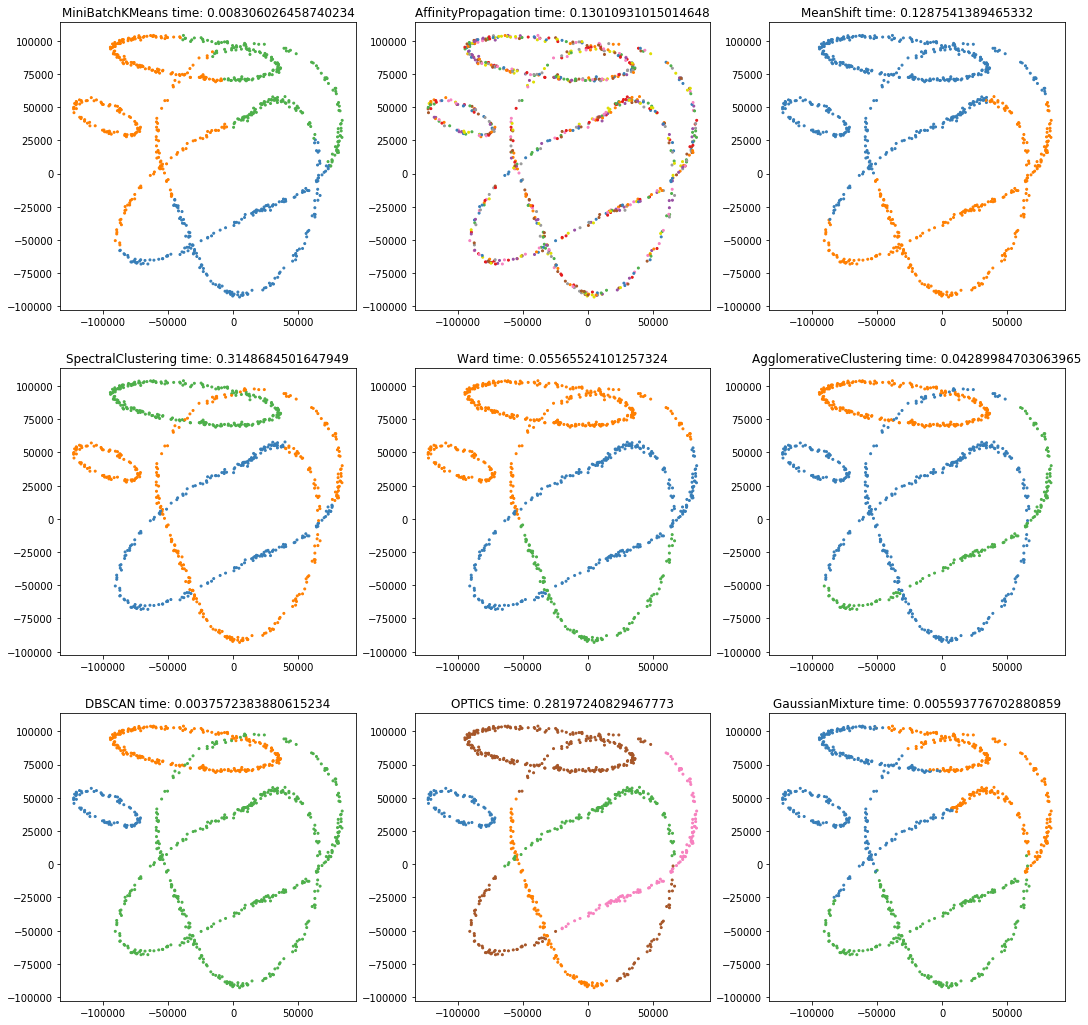

In [17]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 5,
                'xi': 0.05,
                'min_cluster_size': 0.1}
params = default_base.copy()


bandwidth    = cluster.estimate_bandwidth(X, quantile=params['quantile'])
connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ms                   = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means            = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
ward                 = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward', connectivity=connectivity)
spectral             = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack', affinity="nearest_neighbors")
dbscan               = cluster.DBSCAN(eps=23000, min_samples=3)
optics               = cluster.OPTICS(min_samples=params['min_samples'], xi=params['xi'], min_cluster_size=params['min_cluster_size'])
affinity_propagation = cluster.AffinityPropagation(damping=params['damping'], preference=params['preference'])
average_linkage      = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", n_clusters=params['n_clusters'], connectivity=connectivity)
birch                = cluster.Birch(n_clusters=params['n_clusters'])
gmm                  = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')




clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('AgglomerativeClustering', average_linkage),
    ('DBSCAN', dbscan),
    ('OPTICS', optics),
   # ('Birch', birch),
    ('GaussianMixture', gmm)
)

fig, ax =plt.subplots(3,3, figsize=(18,18))
index=0

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)
    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
    cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
    i=int(index/3)
    j=int(index%3)
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
    #y_pred[y_pred<0]=0
    #print(y_pred)
    ax[i,j].scatter(X[:,0], X[:,1], c=colors[y_pred],s=4)
    #print(index, i, j)
    ax[i,j].set_title(name+' time: '+str(t1-t0))
    index=index+1

From this comparison we can clearly see that the DBSCAN is the only onew that correcly separtes the data sample and is also one of the fastest to converge.
Some of the other algorithms are close to the correct result but happen to missclassify the knotted structures.

Special mention can be given to the agglomerative and spectral clustering which are able to separate the knotted ring but are not able to distinguish the not knotted one.

As expected algorithm like k_means are not able to classify correctly this data due to their simmetry ( k-means creates circular clusters which is not our case)

In [18]:
### As last thing we can try the DBSCAN and t-SNE algorithms for the data sample with more noise

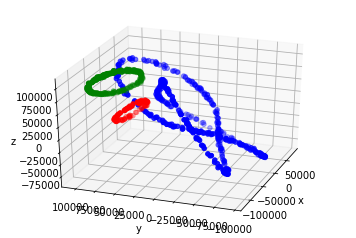

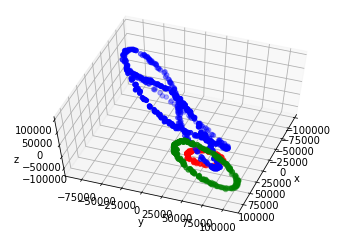

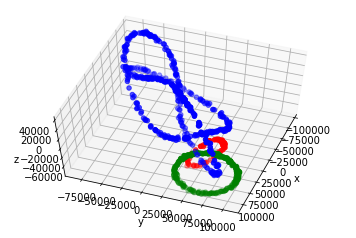

In [19]:
data= np.loadtxt("data_t-SNE_310101_d5_R100_e1_N800.dat", delimiter='\t', dtype=np.int32)
plot_dim(data, 0,1,2, angle1=30, angle2=200)
plot_dim(data, 1,2,3)
plot_dim(data, 1,2,4)



Text(0.5,1,'eps=23000.00, minPts=5, nmi=1.00')

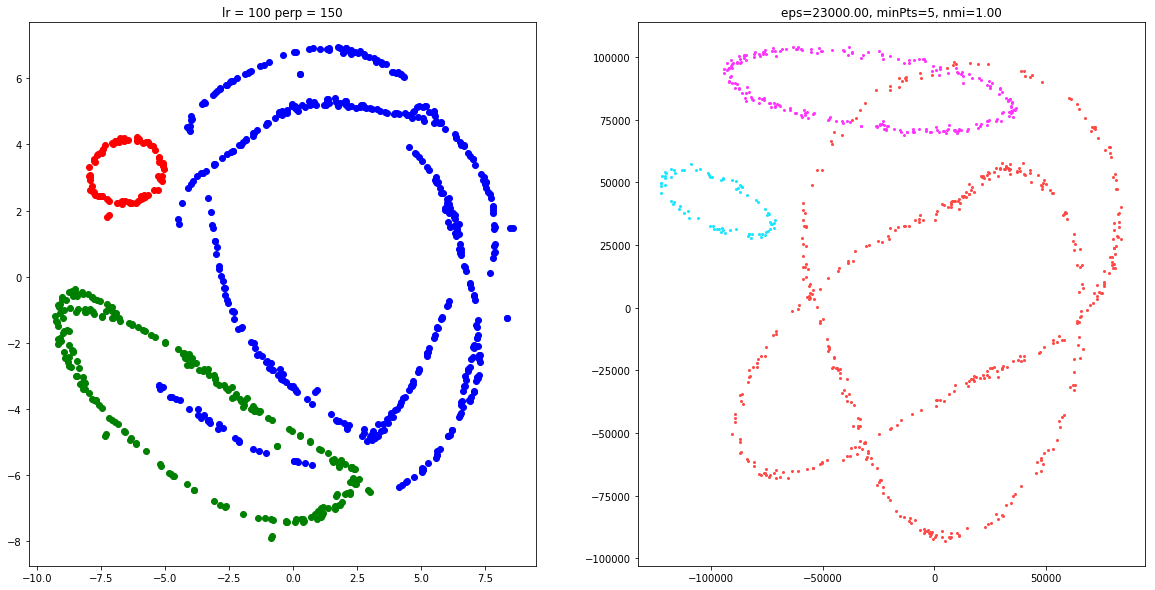

In [20]:
frac1 = 0.1
frac2 = 0.3

n_components = 2
fig, ax = plt.subplots(1,2, figsize=(20,10))

perp = 150
lr   = 100
tsne = manifold.TSNE(n_components=n_components, init='random', perplexity=perp, 
                     early_exaggeration=10.0, learning_rate=lr, 
                     n_iter=5000, random_state=0)
data_transf = tsne.fit_transform(data)

x = data_transf[:,0]
y = data_transf[:,1]

N  = len(x)
N1 = int(N*frac1)
N2 = int(N*frac2)
N3 = int(N*(1-frac1-frac2))

x1 = x[:N1]
x2 = x[N1:(N1+N2)]
x3 = x[(N1+N2):]
y1 = y[:N1]
y2 = y[N1:(N1+N2)]
y3 = y[(N1+N2):]

ax[0].scatter(x1,y1, c='r')
ax[0].scatter(x3,y3, c='b')
ax[0].scatter(x2,y2, c='g')
ax[0].set_title("lr = "+str(lr)+" perp = "+str(perp))

eps=23000
min_samples=5
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(data)
y = model.labels_

plotting_ax(data,y,ax[1])
nmi = NMI(y, Y_true)
ax[1].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))


As we can see even with more noisy data both the algorithm are able to easily visualize and classify the data sample which indicates that those two are probably the best algorithms for this specificy task.